In [1]:
import glob
#glob is used to match 
from shutil import copyfile

In [5]:
emotions = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"] #Define emotion order

In [6]:
participants = glob.glob("/home/anjali/source_emotions/Emotion/*") #Returns a list of all folders with participant numbers

In [7]:
for x in participants:
    part = "%s" %x[-4:] #store current participant number
    for sessions in glob.glob("%s/*" %x): 
        for files in glob.glob("%s/*" %sessions):
            current_session = files[20:-30]
            path = current_session.split("/")
            curr_sess=path[-1]
           
            file = open(files, 'r')
            emotion = int(float(file.readline()))
            abc=sorted(glob.glob("/home/anjali/source_image/images/%s/%s/*" %(part, curr_sess)))
            
            sourcefile_emotion = abc[-1]#get path for last image in sequence, which contains the emotion
            
            sourcefile_neutral = abc[0]#do same for neutral image
            
            dest_neut = "sorted_set/neutral/%s" %sourcefile_neutral[25:] #Generate path to put neutral image
            
            path2 = dest_neut.split("/")
            
            s="/"
            dest_neut2=path2[0:2]
            dest_neut3=path2[6:7]
            s=s.join(dest_neut2)+"/"+s.join(dest_neut3)
            dest_emot = "sorted_set/%s/%s" %(emotions[emotion], sourcefile_emotion[25:]) #Do same for emotion containing image
            path3 = dest_emot.split("/")
            a="/"
            dest_emot2=path3[0:2]
            dest_emot3=path3[6:7]
            a=a.join(dest_emot2)+"/"+a.join(dest_emot3)
            
           
           
            copyfile(sourcefile_neutral, s) #Copy file
            copyfile(sourcefile_emotion, a) #Copy file

In [8]:
import cv2
import random
import numpy as np

In [9]:
emotions = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}


In [10]:
def get_files(emotion): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("dataset/%s/*" %emotion)
    random.shuffle(files)
    training = files[:int(len(files)*0.8)] #get first 80% of file list
    prediction = files[-int(len(files)*0.2):] #get last 20% of file list
    return training, prediction


In [11]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []
    for emotion in emotions:
        training, prediction = get_files(emotion)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            ima= cv2.imread(item) #open image
            image=cv2.resize(ima, (100, 100))
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(emotion))
        for item in prediction: #repeat above process for prediction set
            ima = cv2.imread(item)
            image=cv2.resize(ima, (100, 100))
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(emotion))
    return training_data, training_labels, prediction_data, prediction_labels


In [12]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print ("training fisher face classifier")
    print ("size of training set is:", len(training_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print ("predicting classification set")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [ ]:
metascore = []
for i in range(0,10):
    correct = run_recognizer()
    print ("got", correct, "percent correct!")
    metascore.append(correct)
print ("\n\nend score:", np.mean(metascore), "percent correct!")

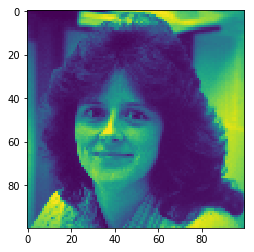

In [45]:
imgpath= "/home/anjali/Downloads/standard_test_images/woman_darkhair.tif"
img = cv2.imread(imgpath)
image1=cv2.resize(img, (100, 100))
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [46]:
pred,conf= fishface.predict(gray)
print(pred)

0


training fisher face classifier
size of training set is: 523 images


In [20]:
import matplotlib.pyplot as plt
def cam():
    cap = cv2.VideoCapture(0)
    
    if cap.isOpened():
        ret, frame = cap.read()
       
    else:
        ret = False

    img1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    
    plt.imshow(img1)
    plt.title('Color Image RGB')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    

    cap.release()
    return img1

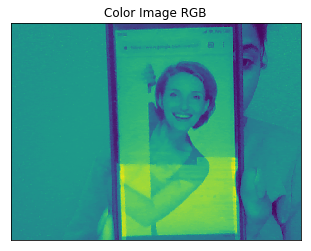

In [88]:
imga1=cam()


In [89]:
img2=cv2.resize(imga1, (100, 100))
predic,config= fishface.predict(img2)
print(predic)
print(emotions[predic])

5
happy
